<a href="https://colab.research.google.com/github/Ala-Mohamed/Machine-Learning-for-Drug-Discovery-/blob/main/ML_milestone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [ ]:
discriptors= pd.read_csv('bioactivity_discriptors_3class_pIC50_pubchem_fp.csv')
activity= pd.read_csv('bioactivity_discriptors_3class_pIC50_pubchem_fp_final.csv')

In [ ]:
print(activity.head())
print(activity.shape)
print(discriptors.head())
print(discriptors.shape)

           Name  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  \
0  CHEMBL336398           1           1           1           0           0   
1  CHEMBL133897           1           1           1           0           0   
2  CHEMBL130478           1           1           0           0           0   
3  CHEMBL130628           1           1           1           0           0   
4  CHEMBL130098           1           1           0           0           0   

   PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  ...  PubchemFP872  \
0           0           0           0           0  ...             0   
1           0           0           0           0  ...             0   
2           0           0           0           0  ...             0   
3           0           0           0           0  ...             0   
4           0           0           0           0  ...             0   

   PubchemFP873  PubchemFP874  PubchemFP875  PubchemFP876  PubchemFP877  \
0             0  

In [ ]:
activity_label=activity['bioactivity_class']
discriptors["label"]=activity_label
print (discriptors.head())
discriptors['molecule_chembl_id']=activity['molecule_chembl_id']
print(discriptors.head())
discriptors.to_csv('final_data_with_lables_and_activiy_7k.csv')

           Name  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  \
0  CHEMBL336398           1           1           1           0           0   
1  CHEMBL133897           1           1           1           0           0   
2  CHEMBL130478           1           1           0           0           0   
3  CHEMBL130628           1           1           1           0           0   
4  CHEMBL130098           1           1           0           0           0   

   PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  ...  PubchemFP874  \
0           0           0           0           0  ...             0   
1           0           0           0           0  ...             0   
2           0           0           0           0  ...             0   
3           0           0           0           0  ...             0   
4           0           0           0           0  ...             0   

   PubchemFP875  PubchemFP876  PubchemFP877  PubchemFP878  PubchemFP879  \
0             0  

In [ ]:
print(discriptors.shape)

(5174, 883)


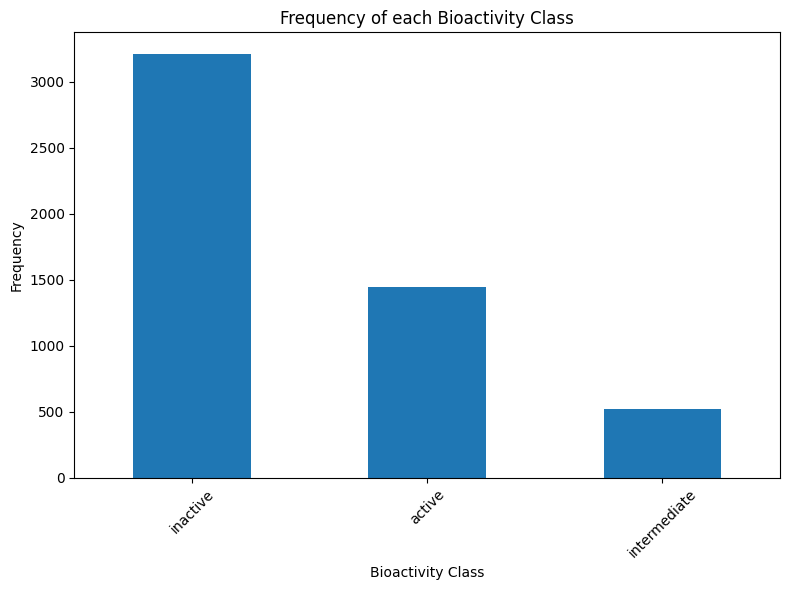

In [ ]:
activity_counts = discriptors['label'].value_counts()

plt.figure(figsize=(8, 6))
activity_counts.plot(kind='bar')
plt.title('Frequency of each Bioactivity Class')
plt.xlabel('Bioactivity Class')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#undersampling
from collections import Counter
from imblearn.under_sampling import ClusterCentroids
from sklearn.preprocessing import LabelEncoder
#data=pd.read_csv('final_data_with_lables_and_activiy_5k.csv')
print(discriptors.head())
print(sorted(Counter(discriptors['bioactivity_class']).items()))

X = discriptors.drop(columns=['bioactivity_class','Name'])
y = discriptors['bioactivity_class']
#le = LabelEncoder()
#y = le.fit_transform(y)
#print(y)
cc = ClusterCentroids(random_state=0   )

# Perform undersampling
X_resampled, y_resampled = cc.fit_resample(X, y)
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['label'] = y_resampled
df_resampled.to_csv('undersampled_data_5k.csv', index=False)

# Check new class distribution
print(sorted(Counter(y_resampled).items()))

           Name  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  \
0  CHEMBL336398           1           1           1           0           0   
1  CHEMBL133897           1           1           1           0           0   
2  CHEMBL130478           1           1           0           0           0   
3  CHEMBL130628           1           1           1           0           0   
4  CHEMBL130098           1           1           0           0           0   

   PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  ...  PubchemFP872  \
0           0           0           0           0  ...             0   
1           0           0           0           0  ...             0   
2           0           0           0           0  ...             0   
3           0           0           0           0  ...             0   
4           0           0           0           0  ...             0   

   PubchemFP873  PubchemFP874  PubchemFP875  PubchemFP876  PubchemFP877  \
0             0  

<ipython-input-25-870a744bbccd>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_resampled['label'] = y_resampled


[('active', 519), ('inactive', 519), ('intermediate', 519)]


In [ ]:
undersamoling=pd.read_csv('undersampled_data_5k.csv')
print(undersamoling.head())
print(undersamoling.shape)

   PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0           1           1           1           1           0           0   
1           1           1           1           1           0           0   
2           1           1           1           0           0           0   
3           1           1           1           0           0           0   
4           1           1           1           0           0           0   

   PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  ...  PubchemFP872  \
0           0           0           0           1  ...             0   
1           0           0           0           1  ...             0   
2           0           0           0           1  ...             0   
3           0           0           0           1  ...             0   
4           0           0           0           1  ...             0   

   PubchemFP873  PubchemFP874  PubchemFP875  PubchemFP876  PubchemFP877  \
0             0             0

In [ ]:
df=pd.read_csv('X_low_variance_removed (1)final.csv')
print(df.head())
print(df.shape)
df['label']=undersamoling['label']
print(df.head())

   0  1  2  3  4  5  6  7  8  9  ...  120  121  122  123  124  125  126  127  \
0  1  1  0  1  0  0  0  0  1  1  ...    1    1    0    1    1    0    1    1   
1  1  1  1  0  0  0  0  0  1  1  ...    0    0    0    0    1    0    0    0   
2  0  1  0  1  0  0  0  0  0  1  ...    1    0    0    1    0    0    1    0   
3  0  1  0  1  0  0  0  0  1  1  ...    0    0    0    0    0    0    0    0   
4  0  0  0  1  0  0  0  0  0  0  ...    1    0    0    1    0    0    1    0   

   128  129  
0    1    1  
1    0    1  
2    1    0  
3    1    0  
4    0    0  

[5 rows x 130 columns]
(1557, 130)
   0  1  2  3  4  5  6  7  8  9  ...  121  122  123  124  125  126  127  128  \
0  1  1  0  1  0  0  0  0  1  1  ...    1    0    1    1    0    1    1    1   
1  1  1  1  0  0  0  0  0  1  1  ...    0    0    0    1    0    0    0    0   
2  0  1  0  1  0  0  0  0  0  1  ...    0    0    1    0    0    1    0    1   
3  0  1  0  1  0  0  0  0  1  1  ...    0    0    0    0    0    0    0    1   

In [ ]:
from operator import le
X = df.drop('label', axis=1)
y = df['label']

#transform categorical
le = LabelEncoder()
y = le.fit_transform(y)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost classifier
model = XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)
model.fit(X_train, y_train)

#evaluaiton
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy)
print(classification_report(y_test, y_pred))

[0 0 0 ... 2 2 2]
Accuracy:  0.6794871794871795
              precision    recall  f1-score   support

           0       0.64      0.58      0.61       109
           1       0.85      0.79      0.82       107
           2       0.57      0.68      0.62        96

    accuracy                           0.68       312
   macro avg       0.69      0.68      0.68       312
weighted avg       0.69      0.68      0.68       312



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the undersampled data
df = pd.read_csv('undersampled_data_7k.csv')

# Separate features (X) and target (y)
X = df.drop('label', axis=1)
y = df['label']

# Convert labels to numerical values (if needed)
y = pd.Categorical(y).codes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Assuming binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split = 0.2) # Adjust epochs and batch_size

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")